# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =   1.0,# 0.1,
    risk_tolerance_mean = 1.0,
    risk_tolerance_stdev = 0.0,
    herding_behavior_mean = 1.0,
    herding_behavior_stdev = 0.0,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 180 # days

In [4]:
seed = 31415

In [5]:
np.random.seed(seed)
scenario = {}

# Scenarios

## Scenario 1

Do nothing

In [6]:
sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
model = CovidModel()
seed = 24
np.random.seed(seed)
setup_city_layout(model, population_size)

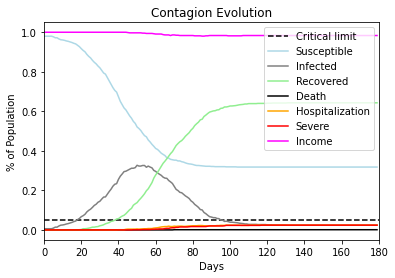

In [7]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

In [8]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario, and as keys to the output
[2039, 4332, 5474]
run with seed 2039:
run with seed 4332:
run with seed 5474:
stats on susceptible:
data: [0.28350000000000003, 0.4375, 0.21464444444444447]
min:
0.21464444444444447
max:
0.4375
std:
0.0931675230567912
mean:
0.3118814814814815
median:
0.28350000000000003
95% confidence interval for the mean:
(0.028425355698961097,0.5953376072640019)
stats on infected:
data: [0.15337222222222222, 0.10011620185922974, 0.1600777777777778]
min:
0.10011620185922974
max:
0.1600777777777778
std:
0.02682568994007198
mean:
0.13785540061974325
median:
0.15337222222222222
95% confidence interval for the mean:
(0.056239984728296846,0.21947081651118966)
stats on recovered:
data: [0.5467277777777778, 0.45740371845949546, 0.6020833333333333]
min:
0.45740371845949546
max:
0.6020833333333333
std:
0.0596053838582484
mean:
0.5354049431902022
median:
0.5467277777777778
95% confidence interval for the mean:
(0.3540594417761499,0.71

<function dict.items>

## Scenario 2

Complete lockdown

In [9]:
sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)

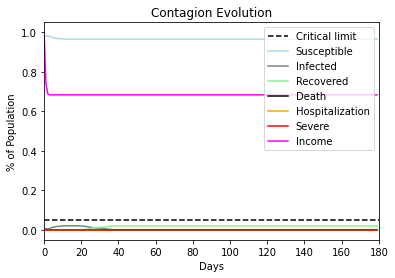

In [10]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [11]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario, and as keys to the output
[873, 115, 9518]
run with seed 873:
run with seed 115:
run with seed 9518:
stats on susceptible:
data: [0.6559, 0.9749999999999996, 0.9674944444444441]
min:
0.6559
max:
0.9749999999999996
std:
0.1486876820620394
mean:
0.8661314814814812
median:
0.9674944444444441
95% confidence interval for the mean:
(0.413758885043578,1.3185040779193844)
stats on infected:
data: [0.07648333333333333, 0.002077777777777778, 0.004655555555555556]
min:
0.002077777777777778
max:
0.07648333333333333
std:
0.03448358916659778
mean:
0.027738888888888886
median:
0.004655555555555556
95% confidence interval for the mean:
(-0.07717518704164436,0.13265296481942213)
stats on recovered:
data: [0.25561666666666666, 0.007922222222222221, 0.020849999999999997]
min:
0.007922222222222221
max:
0.25561666666666666
std:
0.11383958158776243
mean:
0.09479629629629628
median:
0.020849999999999997
95% confidence interval for the mean:
(-0.25155322227897

<function dict.items>

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [12]:
sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

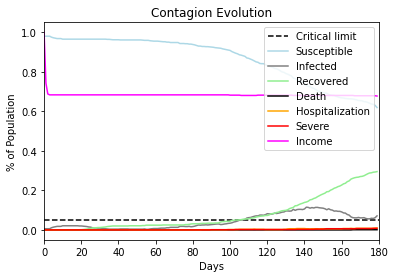

In [13]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [14]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario, and as keys to the output
[2666, 1128, 8478]
run with seed 2666:
run with seed 1128:
run with seed 8478:
stats on susceptible:
data: [0.37350299401197595, 0.9144944444444446, 0.6942388888888887]
min:
0.37350299401197595
max:
0.9144944444444446
std:
0.22212503322243404
mean:
0.6607454424484365
median:
0.6942388888888887
95% confidence interval for the mean:
(-0.01505551576921671,1.3365464006660897)
stats on infected:
data: [0.12228321135506764, 0.010266666666666667, 0.05976111111111111]
min:
0.010266666666666667
max:
0.12228321135506764
std:
0.04583353858585324
mean:
0.06410366304428182
median:
0.05976111111111111
95% confidence interval for the mean:
(-0.07534189536699352,0.20354922145555715)
stats on recovered:
data: [0.4972277666888445, 0.06823888888888888, 0.23200000000000004]
min:
0.06823888888888888
max:
0.4972277666888445
std:
0.17675938667866586
mean:
0.26582221852591115
median:
0.23200000000000004
95% confidence interval for the

<function dict.items>

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [15]:
sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

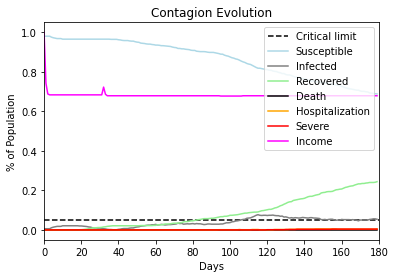

In [16]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [17]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario, and as keys to the output
[8019, 3235, 8585]
run with seed 8019:
run with seed 3235:
run with seed 8585:
stats on susceptible:
data: [0.3665944444444444, 0.4065611111111111, 0.2672944444444445]
min:
0.2672944444444445
max:
0.4065611111111111
std:
0.05855010094771529
mean:
0.3468166666666666
median:
0.3665944444444444
95% confidence interval for the mean:
(0.16868179483264395,0.5249515385006893)
stats on infected:
data: [0.1259888888888889, 0.12501111111111113, 0.14249444444444445]
min:
0.12501111111111113
max:
0.14249444444444445
std:
0.008021196627441367
mean:
0.13116481481481482
median:
0.1259888888888889
95% confidence interval for the mean:
(0.10676084607596129,0.15556878355366835)
stats on recovered:
data: [0.4964166666666668, 0.45193888888888883, 0.5796666666666667]
min:
0.45193888888888883
max:
0.5796666666666667
std:
0.05293939977002927
mean:
0.5093407407407408
median:
0.4964166666666668
95% confidence interval for the mean:
(0.

<function dict.items>

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [18]:
sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

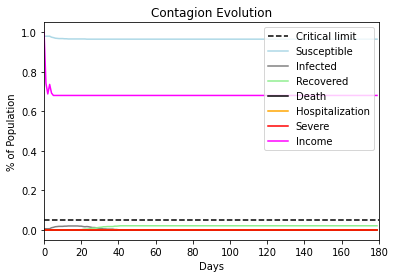

In [19]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [20]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario, and as keys to the output
[3357, 2592, 341]
run with seed 3357:
run with seed 2592:
run with seed 341:
stats on susceptible:
data: [0.9694777777777779, 0.4070944444444444, 0.47510555555555556]
min:
0.4070944444444444
max:
0.9694777777777779
std:
0.2506224293745956
mean:
0.617225925925926
median:
0.47510555555555556
95% confidence interval for the mean:
(-0.14527650554284643,1.3797283573946983)
stats on infected:
data: [0.002561111111111111, 0.12912777777777779, 0.10166666666666667]
min:
0.002561111111111111
max:
0.12912777777777779
std:
0.05436005976260227
mean:
0.07778518518518518
median:
0.10166666666666667
95% confidence interval for the mean:
(-0.08760175902090897,0.24317212939127933)
stats on recovered:
data: [0.016961111111111107, 0.4537777777777777, 0.414738888888889]
min:
0.016961111111111107
max:
0.4537777777777777
std:
0.19736035727608184
mean:
0.2951592592592593
median:
0.414738888888889
95% confidence interval for the mean:


<function dict.items>

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [21]:
sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

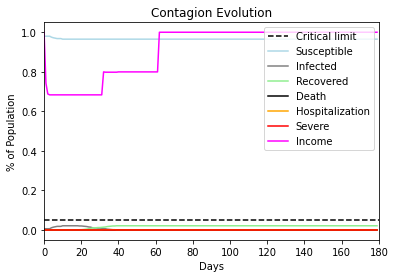

In [22]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [23]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario, and as keys to the output
[3072, 8182, 2613]
run with seed 3072:
run with seed 8182:
run with seed 2613:
stats on susceptible:
data: [0.9322388888888888, 0.5980574980574981, 0.8598777777777774]
min:
0.5980574980574981
max:
0.9322388888888888
std:
0.14355145854440826
mean:
0.7967247215747214
median:
0.8598777777777774
95% confidence interval for the mean:
(0.35997875093616827,1.2334706922132745)
stats on infected:
data: [0.007655555555555558, 0.08479853479853479, 0.020433333333333335]
min:
0.007655555555555558
max:
0.08479853479853479
std:
0.03375926212180225
mean:
0.037629141229141225
median:
0.020433333333333335
95% confidence interval for the mean:
(-0.06508121680505927,0.14033949926334172)
stats on recovered:
data: [0.04810555555555555, 0.3091519591519592, 0.11068888888888889]
min:
0.04810555555555555
max:
0.3091519591519592
std:
0.11128017128949393
mean:
0.15598213453213455
median:
0.11068888888888889
95% confidence interval for the

<function dict.items>

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [24]:
sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

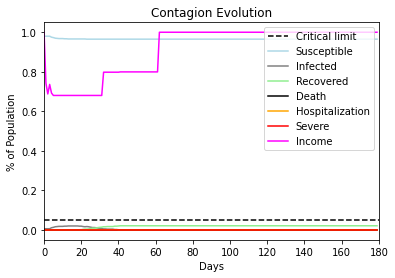

In [25]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [26]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario, and as keys to the output
[9169, 5039, 6535]
run with seed 9169:
run with seed 5039:
run with seed 6535:
stats on susceptible:
data: [0.18472777777777777, 0.47574444444444447, 0.3857174539809271]
min:
0.18472777777777777
max:
0.47574444444444447
std:
0.12165178412627067
mean:
0.34872989206771643
median:
0.3857174539809271
95% confidence interval for the mean:
(-0.021387744331662517,0.7188475284670954)
stats on infected:
data: [0.1579888888888889, 0.09277777777777778, 0.13951541361721]
min:
0.09277777777777778
max:
0.1579888888888889
std:
0.02744320378288057
mean:
0.13009402676129223
median:
0.13951541361721
95% confidence interval for the mean:
(0.04659986518941271,0.21358818833317172)
stats on recovered:
data: [0.6461555555555556, 0.4247277777777779, 0.45751275227323124]
min:
0.4247277777777779
max:
0.6461555555555556
std:
0.09757687713028358
mean:
0.5094653618688549
median:
0.45751275227323124
95% confidence interval for the mean:
(0.

<function dict.items>